In [6]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [7]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer. 
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure 
  # training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model           


def train_model(model, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the feature values and the label values to the 
  # model. The model will train for the specified number 
  # of epochs, gradually learning how the feature values
  # relate to the label values. 
  history = model.fit(x=feature,
                      y=label,
                      batch_size=batch_size,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Gather the history (a snapshot) of each epoch.
  hist = pd.DataFrame(history.history)

  # Specifically gather the model's root mean 
  # squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined build_model and train_model")

Defined build_model and train_model


In [8]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against the training feature and label."""

  # Label the axes.
  plt.xlabel("feature")
  plt.ylabel("label")

  # Plot the feature values vs. label values.
  plt.scatter(feature, label)

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = feature[-1]
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve(epochs, rmse):
  """Plot the loss curve, which shows loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


In [9]:
my_feature = ([1.0, 2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0, 12.0])
my_label   = ([5.0, 8.8,  9.6, 14.2, 18.8, 19.5, 21.4, 26.8, 28.9, 32.0, 33.8, 38.2])

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 927.6046 - root_mean_squared_error: 30.4566
Epoch 2/10
1/1 [==============================] - 0s 9ms/step - loss: 911.7809 - root_mean_squared_error: 30.1957
Epoch 3/10
1/1 [==============================] - 0s 10ms/step - loss: 900.4329 - root_mean_squared_error: 30.0072
Epoch 4/10
1/1 [==============================] - 0s 11ms/step - loss: 891.0090 - root_mean_squared_error: 29.8498
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 882.7004 - root_mean_squared_error: 29.7103
Epoch 6/10
1/1 [==============================] - 0s 12ms/step - loss: 875.1321 - root_mean_squared_error: 29.5826
Epoch 7/10
1/1 [==============================] - 0s 9ms/step - loss: 868.0955 - root_mean_squared_error: 29.4635
Epoch 8/10
1/1 [==============================] - 0s 10ms/step - loss: 861.4608 - root_mean_squared_error: 29.3507
Epoch 9/10
1/1 [==============================] - 0s 9ms/step - loss: 855.1411 - roo

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


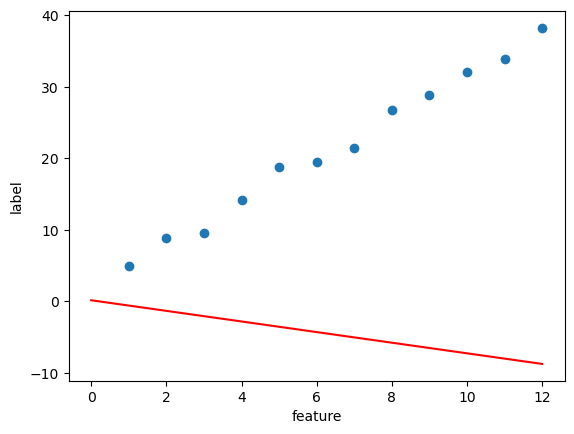

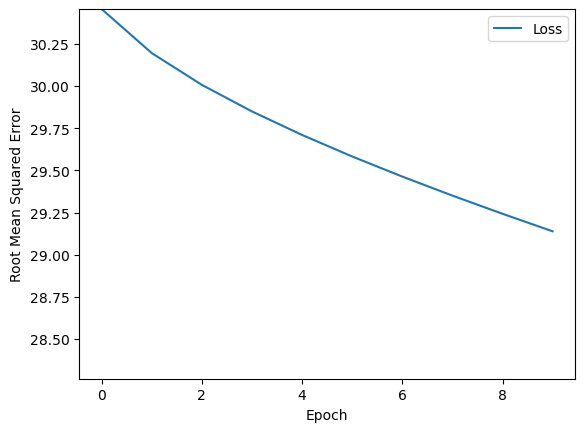

In [10]:
learning_rate=0.01
epochs=10
my_batch_size=12

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

Epoch 1/70
1/1 [==============================] - 0s 192ms/step - loss: 221.1832 - root_mean_squared_error: 14.8722
Epoch 2/70
1/1 [==============================] - 0s 5ms/step - loss: 126.0445 - root_mean_squared_error: 11.2270
Epoch 3/70
1/1 [==============================] - 0s 7ms/step - loss: 80.3436 - root_mean_squared_error: 8.9635
Epoch 4/70
1/1 [==============================] - 0s 4ms/step - loss: 53.0380 - root_mean_squared_error: 7.2827
Epoch 5/70
1/1 [==============================] - 0s 5ms/step - loss: 35.4361 - root_mean_squared_error: 5.9528
Epoch 6/70
1/1 [==============================] - 0s 11ms/step - loss: 23.7223 - root_mean_squared_error: 4.8706
Epoch 7/70
1/1 [==============================] - 0s 6ms/step - loss: 15.8387 - root_mean_squared_error: 3.9798
Epoch 8/70
1/1 [==============================] - 0s 14ms/step - loss: 10.5366 - root_mean_squared_error: 3.2460
Epoch 9/70
1/1 [==============================] - 0s 9ms/step - loss: 7.0016 - root_mean_squared

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


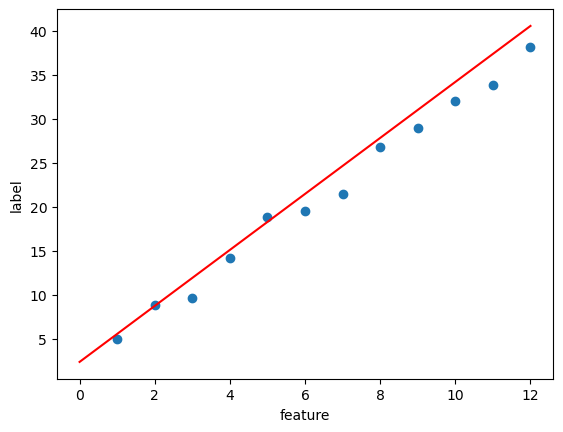

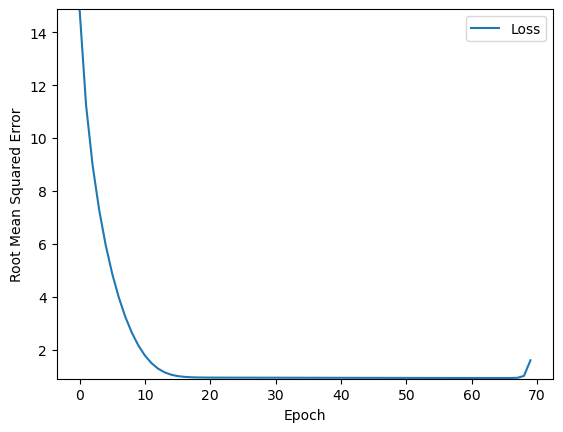

In [11]:
learning_rate=0.14
epochs=70

my_model = build_model(learning_rate)
trained_weight, trained_bias, epochs, rmse = train_model(my_model, my_feature, 
                                                         my_label, epochs,
                                                         my_batch_size)
plot_the_model(trained_weight, trained_bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)